In [1]:
import _pickle
import pandas as pd
import numpy as np
from os.path import join
import collections
import gc
import matplotlib.pyplot as plt

In [2]:
input_folder = join('pickles','3.agg_dfs')
%matplotlib inline
plt.style.use('ggplot')

This notebook explores the datasets to look at metrics, statistics, distributions and to look at various high level questions to look at


# 1. Exploring business data 

In [3]:
business_data = _pickle.load(open(join(input_folder,'business_data.pkl'),'rb'))

In [4]:
business_data.columns

Index(['attributes', 'business_id', 'categories', 'city', 'full_address',
       'hours', 'latitude', 'longitude', 'name', 'neighborhoods', 'open',
       'review_count', 'stars', 'state', 'Accepts Credit Cards',
       'Accepts Insurance', 'Ages Allowed', 'Alcohol', 'Ambience', 'Attire',
       'BYOB', 'BYOB/Corkage', 'By Appointment Only', 'Caters', 'Coat Check',
       'Corkage', 'Delivery', 'Dietary Restrictions', 'Dogs Allowed',
       'Drive-Thru', 'Good For', 'Good For Dancing', 'Good For Groups',
       'Good for Kids', 'Hair Types Specialized In', 'Happy Hour', 'Has TV',
       'Music', 'Noise Level', 'Open 24 Hours', 'Order at Counter',
       'Outdoor Seating', 'Parking', 'Price Range', 'Smoking', 'Take-out',
       'Takes Reservations', 'Waiter Service', 'Wheelchair Accessible',
       'Wi-Fi', 'hours_Friday', 'hours_Monday', 'hours_Saturday',
       'hours_Sunday', 'hours_Thursday', 'hours_Tuesday', 'hours_Wednesday'],
      dtype='object')

In [5]:
def get_categories_list(cat_col):
    """Returns a list of categories, which can then be counted or used as set.
    Input is the category column in the relevant dataframe
    """
    
    all_categories = []
    for category in business_data.categories.values:
        for item in category:
            all_categories.append(item)
    
    all_categories = sorted(all_categories)
    return all_categories

In [6]:
number_businesses = len(set(business_data.business_id.values))
num_unique_cities = len(business_data.city.unique())
percent_bus_with_hours = len(business_data[business_data['hours'] == {}]['hours']) / business_data.shape[0]
percent_bus_open = business_data['open'].sum()/len(business_data['open'])
num_unique_states = len(business_data.state.unique())
unique_categories = set(get_categories_list(business_data['categories']))
category_counter = collections.Counter(get_categories_list(business_data['categories']))

* There are {{'{:,}'.format(number_businesses)}} businesses in the dataset
* There are {{num_unique_cities}} different values in city BUT many typos and sub-cities.
* {{'{:.0f}%'.format(percent_bus_with_hours * 100)}} of businesses do not have hours provided
* {{'{:.0f}%'.format(percent_bus_open * 100)}} of businesses in the database are still open
* There are {{'{:,}'.format(len(unique_categories))}} different categories
* There are {{num_unique_states}} different states - Probably best way to separate cities
* By far the most common cateogry is Restaurants, followed by Shopping and then Food

In [106]:
category_counter.most_common(10)

[('Restaurants', 26729),
 ('Shopping', 12444),
 ('Food', 10143),
 ('Beauty & Spas', 7490),
 ('Health & Medical', 6106),
 ('Home Services', 5866),
 ('Nightlife', 5507),
 ('Automotive', 4888),
 ('Bars', 4727),
 ('Local Services', 4041)]

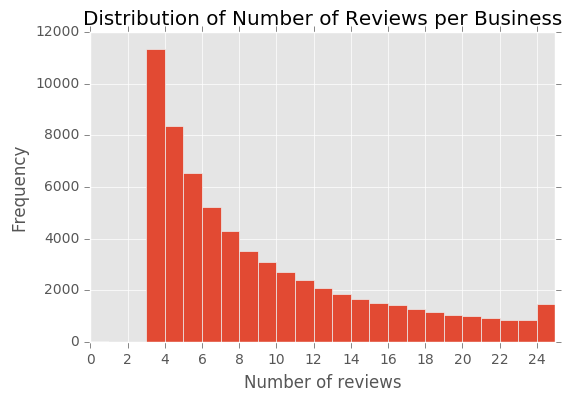

In [107]:
xlims = [0,25]
business_data.review_count.hist(bins=25, range=[xlims[0],xlims[1]])
plt.xlabel('Number of reviews')
plt.ylabel('Frequency')
plt.xticks(np.arange(xlims[0],xlims[1]+1,2))
plt.title('Distribution of Number of Reviews per Business')

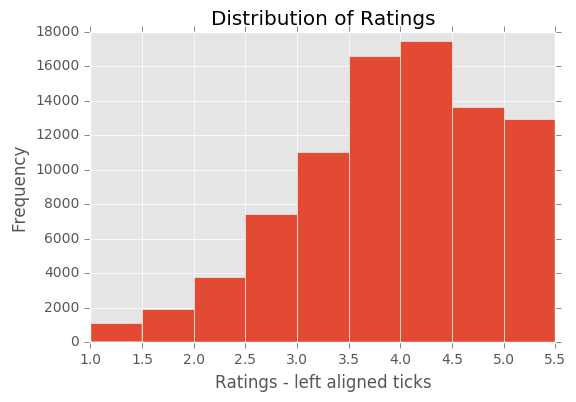

In [108]:
business_data.stars.hist(bins=np.arange(1,6,0.5))
plt.xlabel('Ratings - left aligned ticks')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

* Distribution of reviews with more than 3 reviews is exponential overall, may be interesting to break by categories
* Vast majority of businesses have at least 3 reviews
* The mean, median and mode of ratings are c.{{round(business_data.stars.mean(),1)}}, {{business_data.stars.median()}}, {{business_data.stars.mode()[0]}} 

# 2. Exploring Check-In Data

In [112]:
checkin_data = _pickle.load(open(join(input_folder,'checkin_data.pkl'),'rb'))

* Over {{'{0:.0f}%'.format(len(checkin_data)/len(business_data)*100)}} of businesses have check-in data. This could interesting to look at peaks, and to sell advertising
* Would be worth merging checkin_data with businesses, as otherwise not so relevant

In [113]:
# del checkin_data
# gc.collect()

# 3. Exploring Photo Data

In [114]:
photo_data = _pickle.load(open(join(input_folder,'photo_data.pkl'),'rb'))

In [115]:
photo_data.label.value_counts()

none       120000
outside     16000
menu        16000
inside      16000
food        16000
drink       16000
Name: label, dtype: int64

* There are {{'{:,}'.format(len(photo_data))}} photos in total for {{'{:,}'.format(len(photo_data.business_id.unique()))}} businesses
* ** The number of photos can be added as a feature to the business information**
* **The data with the labels could be used to train a classification neural net so photos can be inferred**
* There are 120,000 photos with no label, and the rest labelled in one way or another

In [116]:
del photo_data
gc.collect()

78

# 4. Exploring Tip Data

In [117]:
tip_data = _pickle.load(open(join(input_folder,'tip_data.pkl'),'rb'))

In [118]:
tip_data.head()

,business_id,date,likes,text,user_id
0,5UmKMjUEUNdYWqANhGckJw,2016-07-17,0,Pizza is garbage. Hoagies are excellent.,ZxdojCZgZhw36xuSGaryRg
1,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,-6rEfobYjMxpUWLNxszaxQ
2,mVHrayjG3uZ_RLHkLj-AMg,2016-02-22,0,Not easy to find. Be sure to put in directions...,5OumCBQ_MyQsltSdbMyunA
3,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,EZ0r9dKKtEGVx2CdnowPCw
4,KayYbHCt-RkbGcPdGOThNg,2013-12-03,0,Great drink specials!,xb6zEQCw9I-Gl0g06e1KsQ


In [119]:
tip_data.groupby('business_id').count().head(5)

,date,likes,text,user_id
business_id,,,,
--0ZoBTQWQra1FxD4rBWmg,2,2,2,2
--1emggGHgoG6ipd_RMb-g,7,7,7,7
--4Pe8BZ6gj57VFL5mUE8g,2,2,2,2
--5jkZ3-nUPZxUvtcbr8Uw,27,27,27,27
--BlvDO_RG2yElKu9XA1_g,23,23,23,23


In [120]:
tip_data.groupby('user_id').count().head(5)

,business_id,date,likes,text
user_id,,,,
--0mI_q_0D1CdU4P_hoImQ,1,1,1,1
--2QZsyXGz1OhiD4-0FQLQ,5,5,5,5
--4TkB_iDShmg41Y_QW9nw,3,3,3,3
--4fX3LBeXoE88gDTK6TKQ,1,1,1,1
--65q1FpAL_UQtVZ2PTGew,156,156,156,156


* An idea could be to merge tips with the business data - if many tips and likes, could warrant changing description
* **A feature for users could be number of tips and likes received**
* **The number of tips and likes could also be added to business**


In [121]:
del tip_data
gc.collect()

48

# 5. Exploring User Data

In [122]:
user_data = _pickle.load(open(join(input_folder,'user_data.pkl'),'rb'))

In [123]:
user_data.columns

Index(['average_stars', 'compliments', 'elite', 'fans', 'friends', 'name',
       'review_count', 'user_id', 'votes', 'yelping_since', 'compliment_cool',
       'compliment_cute', 'compliment_funny', 'compliment_hot',
       'compliment_list', 'compliment_more', 'compliment_note',
       'compliment_photos', 'compliment_plain', 'compliment_profile',
       'compliment_writer', 'num_friends', 'votes_cool', 'votes_funny',
       'votes_useful', 'yelp_tenure'],
      dtype='object')

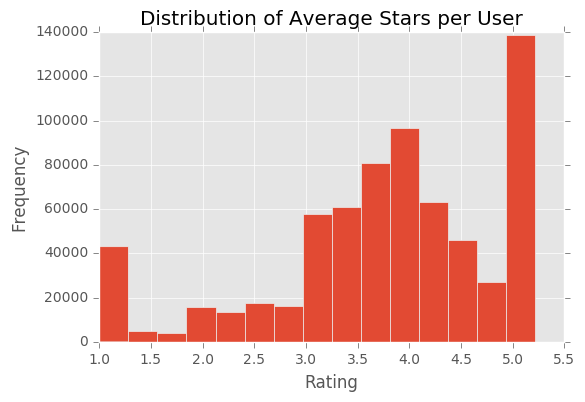

In [124]:
user_data.average_stars.hist(range=(1,5.5), bins=16)
plt.xlabel('Rating')
plt.title('Distribution of Average Stars per User')
plt.ylabel('Frequency')

In [175]:
num_users = len(user_data)
num_users_w_fans = len(user_data[user_data['fans'] > 0])
num_superusers = len(user_data[user_data['fans'] >= 1000])

In [185]:
def get_frequencies(df,col_name,list_of_thresholds):
    """
    For each threshold in list_of_threesholds, prints the number of occurences equal to or above the threshold
    for the column col_name in dataframe df
    params:
    -------
    df: relevant dataframe
    col_name: Relevant column - must be a continuous variable
    list_of_thresholds: Must be an array of numbers
    """
    print('Threshold, Number of occurences equal or above threshold')
    for threshold in list_of_thresholds:
        print(threshold,':',len(df[df[col_name] >= threshold]))

In [186]:
get_frequencies(user_data,'fans',[0,1,2,5,10,50,100,150,500,1000])

Threshold, Number of occurences equal or above threshold
0 : 686556
1 : 156505
2 : 80225
5 : 34011
10 : 17686
50 : 2500
100 : 752
150 : 388
500 : 52
1000 : 11


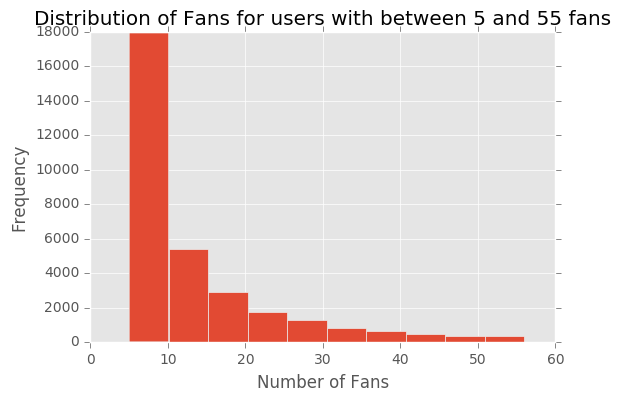

In [208]:
min_range = 5
max_range = 55
user_data.fans.hist(range=(min_range,max_range+1), bins=10)
plt.xlabel('Number of Fans')
plt.ylabel('Frequency')
plt.title('Distribution of Fans for users with between {} and {} fans'.format(min_range,max_range))

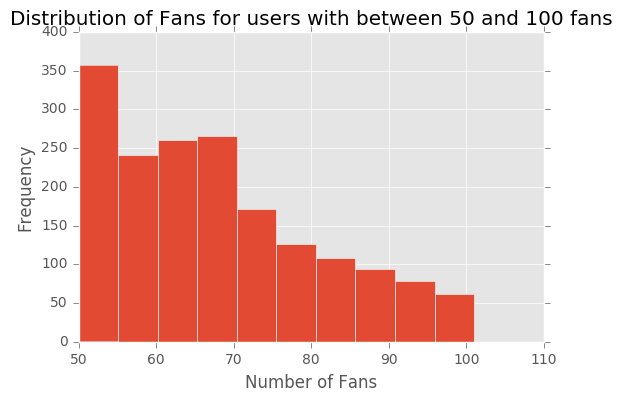

In [207]:
min_range = 50
max_range = 100
user_data.fans.hist(range=(min_range,max_range+1), bins=10)
plt.xlabel('Number of Fans')
plt.ylabel('Frequency')
plt.title('Distribution of Fans for users with between {} and {:,} fans'.format(min_range,max_range))

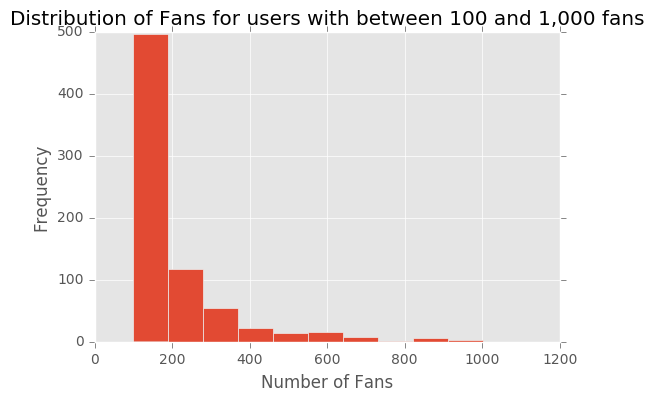

In [206]:
min_range = 100
max_range = 1000
user_data.fans.hist(range=(min_range,max_range+1), bins=10)
plt.xlabel('Number of Fans')
plt.ylabel('Frequency')
plt.title('Distribution of Fans for users with between {} and {:,} fans'.format(min_range,max_range))

In [176]:
user_data.review_count.describe()

count    686556.000000
mean         25.757102
std          83.755973
min           0.000000
25%           2.000000
50%           5.000000
75%          17.000000
max       10897.000000
Name: review_count, dtype: float64

In [190]:
get_frequencies(user_data,'review_count',[0,1,2,5,10,50,100,150,500,1000,2000,5000])

Threshold, Number of occurences equal or above threshold
0 : 686556
1 : 686543
2 : 569646
5 : 376289
10 : 252198
50 : 72273
100 : 38212
150 : 24398
500 : 3683
1000 : 696
2000 : 74
5000 : 4


In [201]:
perc_users_5orlessreviews = len(user_data[user_data['review_count'] <=5])/len(user_data)
perc_users_10orlessreviews = len(user_data[user_data['review_count'] <=10])/len(user_data)

In [249]:
len(user_data[user_data['review_count'] == 9])

16912

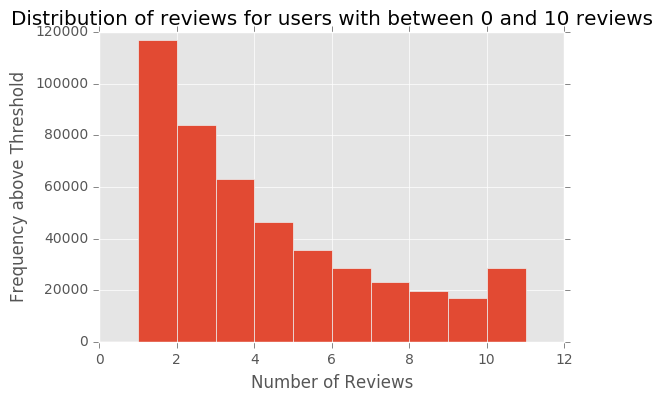

In [252]:
min_range = 0
max_range = 10
user_data.review_count.hist(range=(min_range,max_range+1), bins=11)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency above Threshold')
plt.title('Distribution of reviews for users with between {} and {:,} reviews'.format(min_range,max_range))

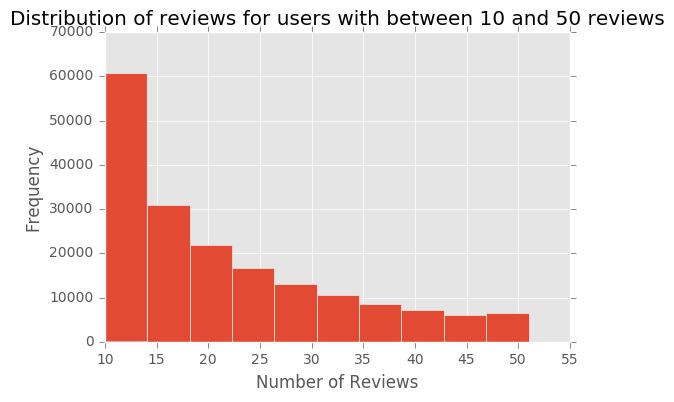

In [259]:
min_range = 10
max_range = 50
user_data.review_count.hist(range=(min_range,max_range+1))
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of reviews for users with between {} and {:,} reviews'.format(min_range,max_range))

* There are {{'{:,}'.format(len(user_data))}} different users
* Only {{'{0:.0f}%'.format(num_users_w_fans/num_users*100)}} of users have at least one fan
* There are {{num_superusers}} superusers with over 1,000 fans in the dataset


* {{'{0:.0f}%'.format(perc_users_5orlessreviews*100) }} of users have 5 reviews or less. 
* {{'{0:.0f}%'.format(perc_users_10orlessreviews*100) }} of users have 10 reviews or less. 
* **Idea - Clustering & Recommendation for people going to similar restaurants AND not friends**


In [264]:
# del user_data
# gc.collect()

# 6. Exploring Review data

In [9]:
review_data = _pickle.load(open(join(input_folder,'review_data.pkl'),'rb'))

In [10]:
num_reviews = review_data.shape[0]
num_business_reviewed = len(review_data.business_id.unique())
perc_bus_reviewed = num_business_reviewed / number_businesses

In [11]:
review_data.columns

Index(['business_id', 'stars', 'date', 'user_id', 'review_id', 'text',
       'review_cool', 'review_funny', 'review_useful'],
      dtype='object')

In [12]:
review_data.isnull().sum()

business_id      0
stars            0
date             0
user_id          0
review_id        0
text             0
review_cool      0
review_funny     0
review_useful    0
dtype: int64

In [13]:
review_data.groupby('business_id')['stars'].count().describe()

count    85539.000000
mean        31.389962
std         98.082111
min          1.000000
25%          4.000000
50%          9.000000
75%         24.000000
max       5558.000000
Name: stars, dtype: float64

In [277]:
review_data.groupby('user_id')['stars'].count().describe()

count    686556.000000
mean          3.910921
std          13.352942
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        1563.000000
Name: stars, dtype: float64

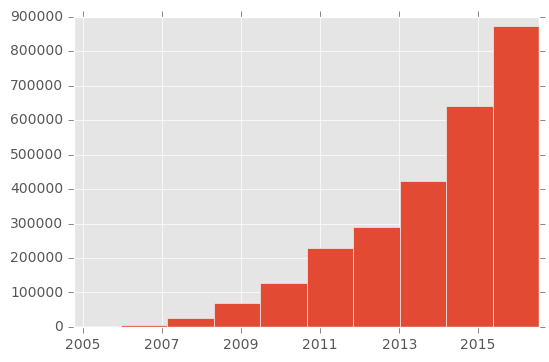

In [16]:
review_data.date.hist()

* {{'{:,}'.format(num_reviews)}} reviews for {{'{:,}'.format(number_businesses)}} businesses ( **{{'{0:.1f}%'.format(perc_bus_reviewed*100)}}** of businesses in the database)
* Once again, very skewed dataset, with most reviews accruing to a few businesses and a few extremely active users
* Most of the reviews are recent - question is whether due to sample or just growth and popularity
* **Idea - Identify turning points for restaurants or anomalies - number of reviews or significant change in rating**